In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
#Data preprocessing

In [4]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
df['doornumber'] = df['doornumber'].replace({'two': 2, 'four': 4})
df['cylindernumber']=df['cylindernumber'].replace({'four':4,'six':6,'eight':8,'twelve':12,'five':5,'three':3,'two':2})

In [6]:
df['cylindernumber']

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylindernumber, Length: 205, dtype: int64

replacing string vlaues to digits

In [7]:
df['doornumber'] 

0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: doornumber, Length: 205, dtype: int64

In [8]:
df = df.drop(columns=['CarName'])
df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,gas,std,4,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


assuming the Car name column won't affect the car price so droping that column

In [9]:
df.describe()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
#checking is there any missing values or null values
df.isna().sum()

car_ID              0
symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [11]:

# Perform one-hot encoding
df = pd.get_dummies(df, columns=['fueltype','aspiration','carbody','drivewheel','enginetype','fuelsystem'])
df

,car_ID,symboling,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,2,front,88.6,168.8,64.1,48.8,2548,4,...,False,False,False,False,False,False,False,True,False,False
1,2,3,2,front,88.6,168.8,64.1,48.8,2548,4,...,False,False,False,False,False,False,False,True,False,False
2,3,1,2,front,94.5,171.2,65.5,52.4,2823,6,...,True,False,False,False,False,False,False,True,False,False
3,4,2,4,front,99.8,176.6,66.2,54.3,2337,4,...,False,False,False,False,False,False,False,True,False,False
4,5,2,4,front,99.4,176.6,66.4,54.3,2824,5,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,4,front,109.1,188.8,68.9,55.5,2952,4,...,False,False,False,False,False,False,False,True,False,False
201,202,-1,4,front,109.1,188.8,68.8,55.5,3049,4,...,False,False,False,False,False,False,False,True,False,False
202,203,-1,4,front,109.1,188.8,68.9,55.5,3012,6,...,True,False,False,False,False,False,False,True,False,False
203,204,-1,4,front,109.1,188.8,68.9,55.5,3217,6,...,False,False,False,False,False,True,False,False,False,False


One-hot encoding creates new binary (0/1) columns for each unique category in these categorical columns, effectively converting them into a numerical format suitable for machine learning algorithms.After running this code,  Each unique category in those columns is now represented by a binary column, making the data suitable for use in machine learning algorithms that require numeric input.

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

#  label encoding to the 'symboling' column
df['symboling'] = label_encoder.fit_transform(df['symboling'])

df['doornumber'] = label_encoder.fit_transform(df['doornumber'])

df['cylindernumber'] = label_encoder.fit_transform(df['cylindernumber'])




These code applies label encoding to the 'symboling','doornumber,cylindernumber  column, converting its categorical values into numeric values.Label encoding is appropriate when you have categorical variables with a clear ordinal relationship, where the order of the categories matters in the context of your analysis or modeling.

In [13]:
df[['symboling' ,'doornumber','cylindernumber']]

,symboling,doornumber,cylindernumber
0,5,0,2
1,5,0,2
2,3,0,4
3,4,1,2
4,4,1,3
...,...,...,...
200,1,1,2
201,1,1,2
202,1,1,4
203,1,1,4


In [14]:
df.columns

Index(['car_ID', 'symboling', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'fueltype_diesel',
       'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [15]:
#x is the independent and y is the dependent variable
x = df[['symboling', 'doornumber', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg',  'fueltype_diesel',
       'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi']]
y = df['price'] 

In [16]:
# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [17]:
x_train

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
34,3,0,93.7,150.0,64.0,52.6,1956,2,92,2.91,...,False,False,True,False,False,False,False,False,False,False
30,4,0,86.6,144.6,63.9,50.8,1713,2,92,2.91,...,False,False,True,False,False,False,False,False,False,False
99,2,1,97.2,173.4,65.2,54.7,2324,2,120,3.33,...,False,False,False,True,False,False,False,False,False,False
8,3,1,105.8,192.7,71.4,55.9,3086,3,131,3.13,...,False,False,False,False,False,False,False,True,False,False
96,3,1,94.5,165.3,63.8,54.5,1971,2,97,3.15,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,3,0,98.4,175.7,72.3,50.5,3366,5,203,3.94,...,False,False,False,False,False,False,False,True,False,False
9,2,0,99.5,178.2,67.9,52.0,3053,3,131,3.13,...,False,False,False,False,False,False,False,True,False,False
84,5,0,95.9,173.2,66.3,50.2,2926,2,156,3.59,...,False,False,False,False,False,False,False,False,True,False
145,2,1,97.0,172.0,65.4,54.3,2510,2,108,3.62,...,False,False,False,False,False,False,False,True,False,False


In [18]:
x_test

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
126,5,0,89.5,168.9,65.0,51.6,2756,4,194,3.74,...,False,False,False,False,False,False,False,True,False,False
92,3,1,94.5,165.3,63.8,54.5,1938,2,97,3.15,...,False,False,False,True,False,False,False,False,False,False
82,5,0,95.9,173.2,66.3,50.2,2833,2,156,3.58,...,False,False,False,False,False,False,False,False,True,False
170,4,0,98.4,176.2,65.6,52.0,2679,2,146,3.62,...,False,False,False,False,False,False,False,True,False,False
21,3,0,93.7,157.3,63.8,50.8,1876,2,90,2.97,...,False,False,False,True,False,False,False,False,False,False
5,4,0,99.8,177.3,66.3,53.1,2507,3,136,3.19,...,False,False,False,False,False,False,False,True,False,False
24,3,1,93.7,157.3,63.8,50.6,1967,2,90,2.97,...,False,False,False,True,False,False,False,False,False,False
159,2,1,95.7,166.3,64.4,52.8,2275,2,110,3.27,...,False,False,False,False,False,True,False,False,False,False
177,1,1,102.4,175.6,66.5,53.9,2458,2,122,3.31,...,False,False,False,False,False,False,False,True,False,False
57,5,0,95.3,169.0,65.7,49.6,2385,0,70,3.33,...,False,True,False,False,True,False,False,False,False,False


In [19]:
reg=LinearRegression()

In [20]:
reg.fit(x_train,y_train)

LinearRegression()

In [21]:
#making predictions
pred=reg.predict(x_test)
pred

array([30357.0373271 ,  7026.15213384, 13359.91678473, 16341.01911423,
        6947.50325738, 16123.2401434 ,  6395.27800374,  7572.29522188,
        7796.83363478, 11857.83259705,  6211.00249856, 13148.1498645 ,
       20913.87438159, 11410.56788996,  7144.29580941, 17643.34740386,
        8535.8034916 , 19362.89817977,  6349.64471515, 20234.03224334,
        6707.20245036, 15984.27291611, 11845.        , 13559.44514083,
       10083.0589258 , 17678.45992552,  8914.32580626, 15798.34989668,
       25884.32653098, 12689.96063026,  7978.4028098 , 17461.77628535,
        6970.79380729,  7012.38282568, 21201.24175163,  8866.00915059,
       32457.25630316, 12852.51297573,  8841.15675426,  6689.95616697,
       17643.34740386])

In [22]:
reg.coef_

array([ 2.54817438e+02,  1.93190232e+02, -6.73188510e+00,  8.56281169e+00,
        6.23752098e+02,  2.74897198e+02,  2.56651941e+00,  1.97826910e+03,
        1.40661376e+02, -2.63253521e+03, -3.35650484e+03, -1.27142880e+03,
       -6.18779908e+00,  3.34276130e+00,  8.09605069e+01,  1.50313520e+02,
        5.46150955e+03, -5.46150955e+03, -9.97924265e+02,  9.97924265e+02,
        3.46232436e+03,  1.47503223e+03, -1.38932253e+03, -9.69288693e+02,
       -2.57874537e+03, -6.04748999e+02, -8.71702055e+02,  1.47645105e+03,
       -3.54790940e+03, -1.55667459e+03, -2.08368725e+03,  5.63485397e+02,
        6.66215335e+02, -7.20368785e+03,  1.31622584e+04, -4.01272414e+02,
        4.01815240e+02, -1.74909405e+03,  5.46150955e+03, -2.28262623e+03,
        6.27655533e+02, -2.13008377e+03,  7.20961375e+01])

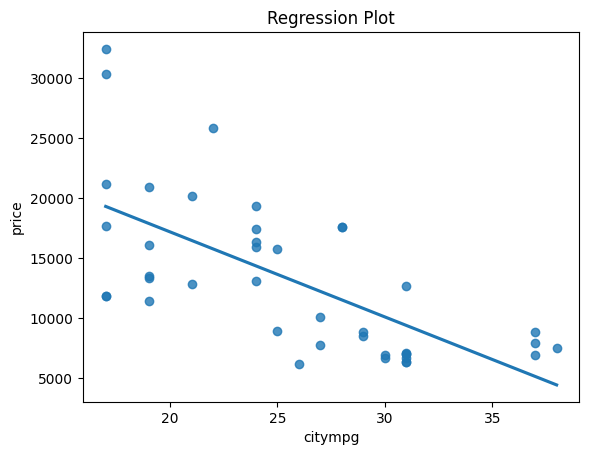

In [24]:

sns.regplot(x=x_test.citympg, y=pred, ci=None)
plt.xlabel('citympg')
plt.ylabel('price')
plt.title('Regression Plot')
plt.show()


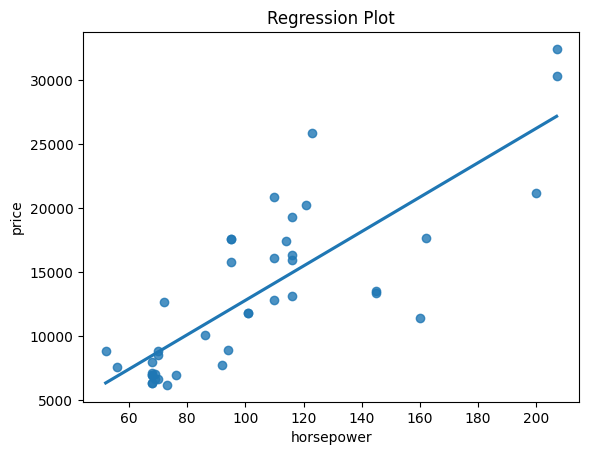

In [25]:
sns.regplot(x=x_test.horsepower, y=pred, ci=None)
plt.xlabel('horsepower')
plt.ylabel('price')
plt.title('Regression Plot')
plt.show()


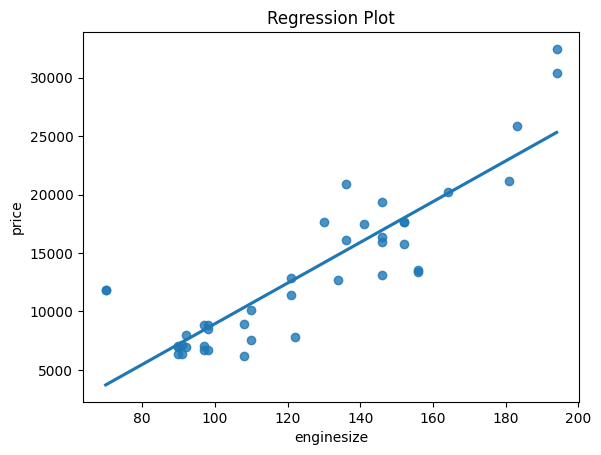

In [26]:
sns.regplot(x=x_test.enginesize, y=pred, ci=None)
plt.xlabel('enginesize')
plt.ylabel('price')
plt.title('Regression Plot')
plt.show()


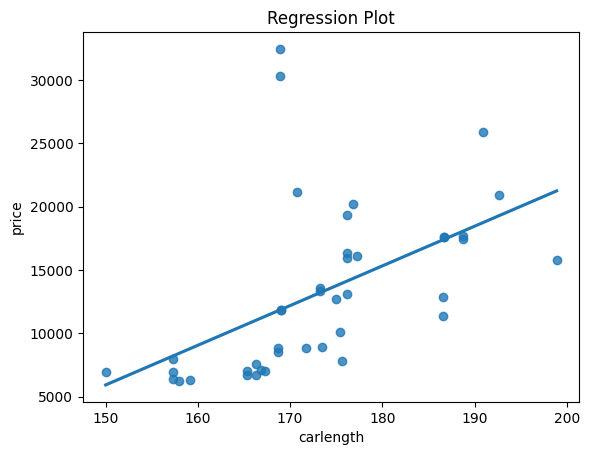

In [27]:
sns.regplot(x=x_test.carlength, y=pred, ci=None)
plt.xlabel('carlength')
plt.ylabel('price')
plt.title('Regression Plot')
plt.show()


In [28]:
reg.score(x_test,y_test)

0.8745754619925483

In the context of machine learning and regression, the score is typically a measure of how well the model fits the test data. This value indicates the model's predictive accuracy, and it can range from 0 to 1, with higher values indicating a better fit. An R-squared score of 0.87 means that the model explains 87% of the variance in the test data. 

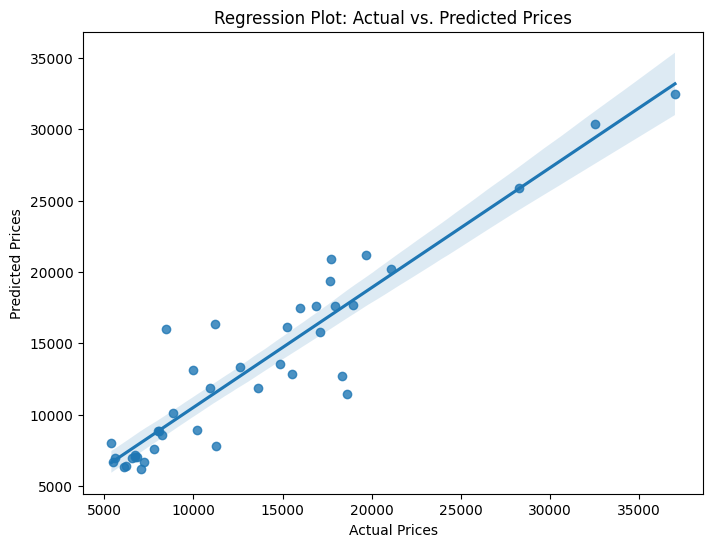

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn

# Create a regression plot (scatter plot with a regression line)
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Regression Plot: Actual vs. Predicted Prices')
plt.show()

When points are closer to the line and the line itself is a good fit, it indicates that  model is performing well in predicting car prices, and the relationships it captures are consistent with the linear regression assumption.

# **Evaluation of model**


In [49]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Import r2_score

mse = mean_squared_error(y_test, pred)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(y_test, pred)
print("Mean Absolute Error (MAE):", mae)

r_squared = r2_score(y_test, pred)
print("R-squared (coefficient of determination):", r_squared)


Mean Squared Error (MSE): 6655630.026325966
Root Mean Squared Error (RMSE): 2579.8507759802633
Mean Absolute Error (MAE): 1826.4116772476834
R-squared (coefficient of determination): 0.8745754619925483




1. **Mean Squared Error (MSE)**:
MSE measures the average squared difference between  model's predictions and the actual car prices. the MSE is approximately 6,655,630.03, which means that, on average,  model's predictions have a squared error of about 6,655,630.03 units. This provides a measure of the prediction accuracy.Lower MSE values are better, indicating that  model's predictions are, on average, closer to the actual car prices.

2. **Root Mean Squared Error (RMSE)**:
 RMSE is the square root of the MSE and is in the same units as the target variable (car prices).The RMSE is approximately 2,579.85, which means that, on average, your model's predictions have an error of about 2,579.85 units in terms of car prices.
Lower RMSE values indicate more accurate predictions.

3. **Mean Absolute Error **:
it calculates the average absolute difference between  model's predictions and the actual car prices.The Mean absolute error is approximately 1,826.41, indicating that, on average,  model's predictions deviate from the actual car prices by about 1,826.41 units.

4. **R-squared (coefficient of determination)**:
R-squared measures the proportion of variance in the car prices that is explained by  model.An R-squared value of approximately 0.875 means that  model explains around 87.55% of the variance in car prices. This suggests that  model is doing a good job of capturing the underlying patterns in the data.R-squared values range from 0 to 1, where 1 indicates a perfect fit. An R-squared value closer to 1 is desirable, indicating a better model fit.

In summary, suggest that  model is accurate and explains a significant portion of the variance in car prices and  the variables we used are significantly effect the car price

# Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x = df[[ 'symboling', 'doornumber', 'wheelbase',
        'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
        'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
        'peakrpm', 'citympg', 'highwaympg']]

# Target variable
y = df['price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.7, random_state=42)

# Create the Decision Tree Regressor object
regressor = DecisionTreeRegressor(max_depth=8, random_state=100)

# Fit the model
regressor.fit(x_train, y_train)

# Predict the values of the test data
pred_d = regressor.predict(x_test)

In [91]:
y_test

15     30760.000
9      17859.167
100     9549.000
132    11850.000
68     28248.000
         ...    
56     11845.000
128    37028.000
76      5389.000
144     9233.000
104    17199.000
Name: price, Length: 62, dtype: float64

In [92]:
pred_d

array([36880.        , 23875.        ,  9383.66666667, 11932.        ,
       31600.        ,  6434.44444444,  7957.16666667,  7957.16666667,
        9383.66666667,  7995.        , 24565.        ,  7957.16666667,
       12764.        , 11248.        , 45400.        ,  6693.5       ,
        5472.75      , 12764.        ,  7262.33333333,  9383.66666667,
       10245.        , 14255.66666667,  6434.44444444,  5472.75      ,
        7609.        , 36880.        ,  9989.        , 15801.25      ,
        7122.        , 15801.25      , 31600.        ,  7609.        ,
        9136.5       , 18179.4       ,  7957.        , 31600.        ,
        9383.66666667, 13295.        ,  6575.        , 14255.66666667,
        7957.16666667,  8845.        , 16695.        ,  9136.5       ,
        7122.        ,  7957.16666667,  7609.        ,  7957.16666667,
       17950.        , 12764.        ,  8916.5       , 18179.4       ,
        5472.75      , 10898.        ,  7122.        , 16500.        ,
      

# Evaluation 

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, pred_d)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred_d)
r_squared = r2_score(y_test, pred_d)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (coefficient of determination):", r_squared)


Mean Squared Error (MSE): 8648624.418737555
Root Mean Squared Error (RMSE): 2940.854368842081
Mean Absolute Error (MAE): 1973.0539372759856
R-squared (coefficient of determination): 0.8751720865209603


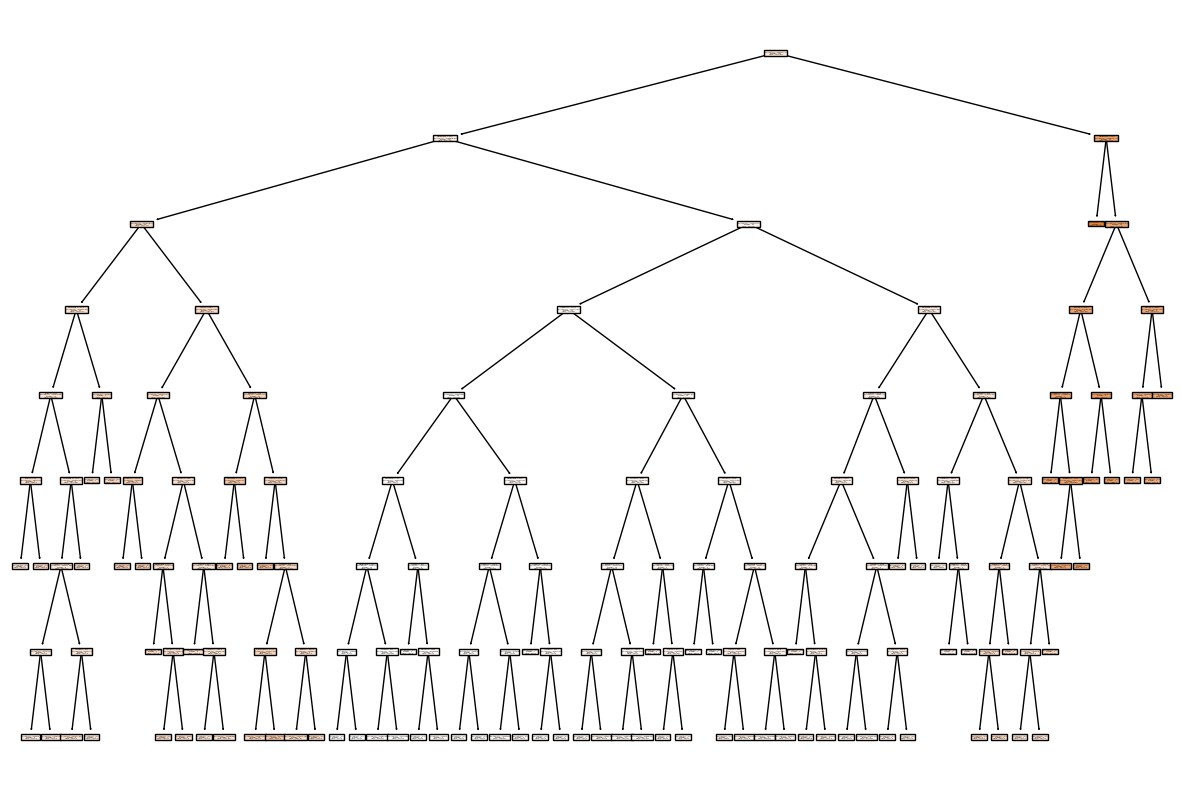

In [97]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(regressor, filled=True, feature_names=x.columns.tolist())
plt.show()


#we convert the Pandas Index to a list of feature names using the .tolist() method. 
#using .tolist(), we convert the Pandas Index object x.columns into a list of feature names

# Random Forest Regressor

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement xgboost (from versions: none)
ERROR: No matching distribution found for xgboost


In [4]:
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [18]:
df=pd.read_csv("CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [29]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [30]:
df['doornumber'] = df['doornumber'].replace({'two': 2, 'four': 4})
df['cylindernumber']=df['cylindernumber'].replace({'four':4,'six':6,'eight':8,'twelve':12,'five':5,'three':3,'two':2})

In [31]:
df = df.drop(columns=['CarName'])
df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,gas,std,4,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [34]:
# Perform one-hot encoding
df = pd.get_dummies(df, columns=['fueltype','aspiration','carbody','drivewheel','enginetype','fuelsystem'])
df

,car_ID,symboling,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,2,front,88.6,168.8,64.1,48.8,2548,4,...,False,False,False,False,False,False,False,True,False,False
1,2,3,2,front,88.6,168.8,64.1,48.8,2548,4,...,False,False,False,False,False,False,False,True,False,False
2,3,1,2,front,94.5,171.2,65.5,52.4,2823,6,...,True,False,False,False,False,False,False,True,False,False
3,4,2,4,front,99.8,176.6,66.2,54.3,2337,4,...,False,False,False,False,False,False,False,True,False,False
4,5,2,4,front,99.4,176.6,66.4,54.3,2824,5,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,4,front,109.1,188.8,68.9,55.5,2952,4,...,False,False,False,False,False,False,False,True,False,False
201,202,-1,4,front,109.1,188.8,68.8,55.5,3049,4,...,False,False,False,False,False,False,False,True,False,False
202,203,-1,4,front,109.1,188.8,68.9,55.5,3012,6,...,True,False,False,False,False,False,False,True,False,False
203,204,-1,4,front,109.1,188.8,68.9,55.5,3217,6,...,False,False,False,False,False,True,False,False,False,False


In [35]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

#  label encoding to the 'symboling' column
df['symboling'] = label_encoder.fit_transform(df['symboling'])

df['doornumber'] = label_encoder.fit_transform(df['doornumber'])

df['cylindernumber'] = label_encoder.fit_transform(df['cylindernumber'])


In [36]:
df.columns

Index(['car_ID', 'symboling', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'fueltype_diesel',
       'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [37]:
#x is the independent and y is the dependent variable
x = df[['symboling', 'doornumber', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg',  'fueltype_diesel',
       'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi']]
y = df['price'] 

In [38]:
# Step2: Split the training test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [42]:
# Step 3: Fit a Decision Tree model as comparison
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create and fit a Decision Tree Regressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred

array([36880., 15998.,  8845., 12170., 35056.,  5195.,  7995.,  8358.,
        8921.,  7995., 12170.,  8058., 15250., 11248., 45400.,  6338.,
        5399., 12764.,  6989.,  9233., 10245., 13499.,  7099.,  5389.,
        7609., 36880.,  8449., 16515.,  7349., 15985., 35056.,  6229.,
        6785., 19045.,  7957., 33278., 15250., 11845.,  6575., 14869.,
        8949.])

# Evaluation 

In [46]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (coefficient of determination):", r_squared)


Mean Squared Error (MSE): 7951869.532972903
Root Mean Squared Error (RMSE): 2819.9059439940374
Mean Absolute Error (MAE): 1911.4309024390245
R-squared (coefficient of determination): 0.8992720481631568


# SVM

In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Features
x = df[[ 'symboling', 'doornumber', 'wheelbase',
        'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
        'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
        'peakrpm', 'citympg', 'highwaympg']]

# Target variable
y = df['price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(x_train, y_train)

# Make predictions with the Gradient Boosting model
gb_predictions = gb_regressor.predict(x_test)

# Now, use the predictions as input features for the SVM
x_combined = np.column_stack((x_test, gb_predictions))

# Create the Support Vector Machine Regressor (SVM)
svm_regressor = SVR(kernel='linear', C=1.0)

# Fit the SVM model
svm_regressor.fit(x_combined, y_test)

# Predict the values of the test data using the SVM
pred_s = svm_regressor.predict(x_combined)

In [54]:
pred_s

array([32607.83410649, 17110.79122006,  8950.23363432, 12191.23580407,
       28387.60814308,  7065.33194079,  7910.11674428,  7666.08100015,
        9005.47911185,  7758.40854119, 14049.42984282,  7475.79090776,
       13875.30492006, 11113.682562  , 41055.50244467,  6626.9434301 ,
        5767.85018376, 12612.30533262,  8212.29514368,  8685.52585039,
       10049.91186971, 14695.31740238,  7083.22958961,  6485.43379559,
        6702.9688945 , 31830.63261639, 10119.72791451, 14648.26294373,
        7148.44991701, 14894.25059037, 29053.63322167,  6750.26348497,
        6926.26951443, 18643.36433335,  8075.72311646, 28005.06113522,
        9521.78852834, 10973.49818884,  6994.84265928, 13369.74326445,
        8059.21259015])

# Evaluation

In [55]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


mse=mean_squared_error(y_test,pred_s)
print("Mean Squared Error (MSE):",mse)

rmse=np.sqrt(mse)
print("Root Mean Squared Error (RMSE):",rmse )



mae=mean_absolute_error(y_test,pred_s)
print("Mean Absolute Error (MAE):",mae)

r_squared=r2_score(y_test,pred_s)
print("R-squared (coefficient of determination):",r_squared)

Mean Squared Error (MSE): 4008246.5915332166
Root Mean Squared Error (RMSE): 2002.0605863792475
Mean Absolute Error (MAE): 1177.5545219647
R-squared (coefficient of determination): 0.9492267236090826


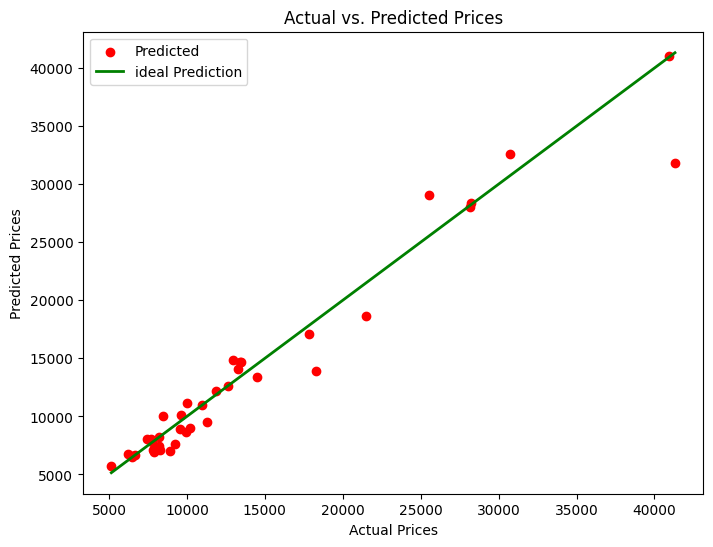

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_s, color='red', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linestyle='-', linewidth=2, label='ideal Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()